# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data


Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [1]:
import numpy as np
import pandas as pd
from typing import List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [ ]:
data.isna().sum()
# в данных есть пропуски

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
data = data.fillna("")
data.sample(10)

,id,keyword,location,text,target
6737,9654,thunderstorm,"Lethbridge, AB, Canada",Wed 20:30: Mainly cloudy. 60 percent chance of...,0
123,176,aftershock,,Aftershock ã¢ (2010) Fullã¢ Streaming - YouT...,0
395,570,arson,"Eldoret, kenya",#Kisii Police in Kisii hunt for students over ...,1
3072,4407,electrocute,"Dalkeith, Scotland",Wtf Thomas Edison after making the lightbulb u...,0
6442,9217,suicide%20bombing,,&lt; Suicide Bombing Of European Union Car Kil...,1
5228,7474,obliteration,,@ashberxo @mind_mischief the removal of all tr...,0
1994,2867,damage,Right here,@IndiGo6E But if you are carful about spotting...,0
4472,6361,hostages,TonyJ@Centralizedhockey.com,Holmgren: We referred to those 35 days as 'the...,1
1235,1776,buildings%20on%20fire,"Tulsa, Oklahoma",Multiple Buildings On Fire In Downtown Hinton ...,1
5094,7266,nuclear%20disaster,,Fukushima Nuclear Disaster | Increased Thyroid...,1


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?


In [ ]:
class_1 = train[train["target"]==1]
share_of_1_train = round(class_1.shape[0]/train.shape[0] * 100, 2)
share_of_1_train # сколько процентов в обучающей выбоке занимает 1 класс

43.25

In [ ]:
class_0 = train[train["target"] == 0]
share_of_0_train = round(class_0.shape[0]/train.shape[0] * 100, 2)
share_of_0_train # сколько процентов в обучающей выбоке занимает 0 класс

56.75

**вывод**: выборка достаточно сбалансированная, дисбаланса классов нет


2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [ ]:
popular_keywords = sorted(list(train.keyword.value_counts()[1:11].index))
popular_keywords

['damage',
 'deluge',
 'derail',
 'fatalities',
 'fatality',
 'fear',
 'refugees',
 'siren',
 'tsunami',
 'wreckage']

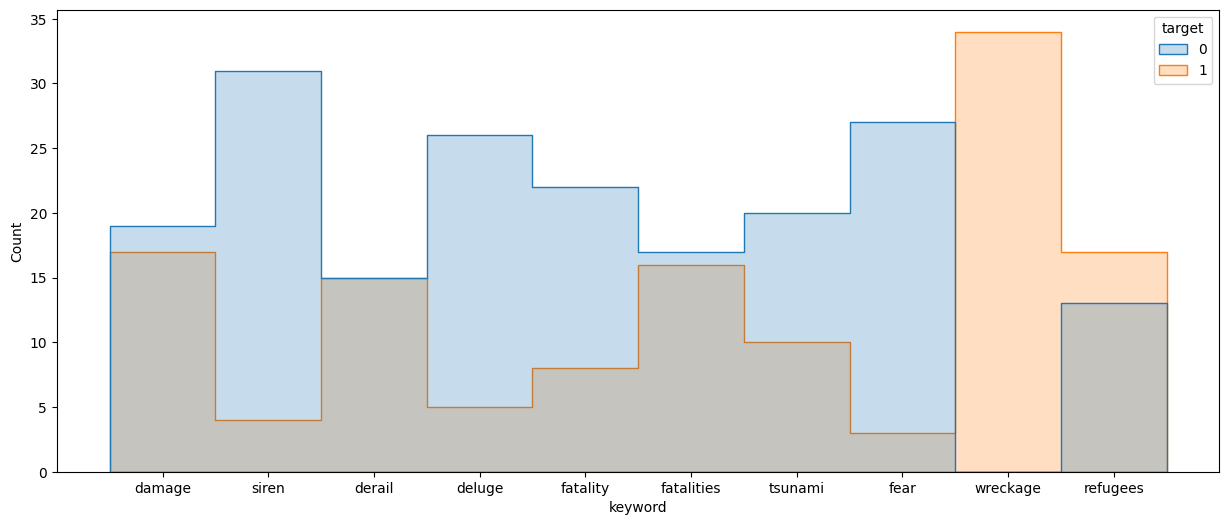

In [ ]:
# reference

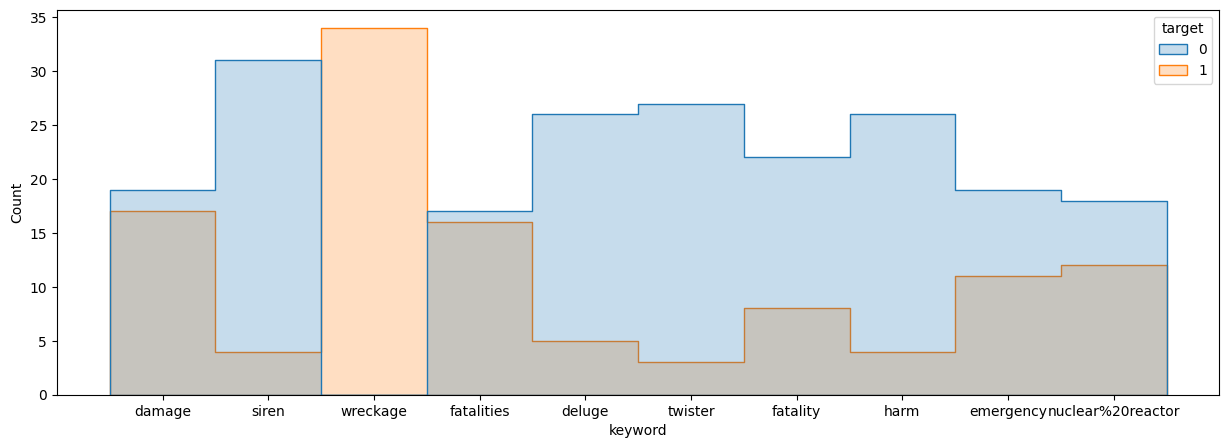

In [ ]:
# -- MY CODE HERE --
fig, ax = plt.subplots(figsize = (15, 6))
pop = train[train["keyword"].isin(popular_keywords)]
sns.histplot(pop, x = "keyword", hue = "target", element="step")
plt.show()

**Выводы**: можно заметить, что много самых популярных слов их "keyword" относятся к нулевому классу, что говорит о том, что твит был не о катастрофе, на другую темy

также по использованию этих самых популярных слов можно сказать, что нулевой класс превалирует над первым => дисбаланс

## Задание 3 (0.5 балла)

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [ ]:
train.loc[[6590, 7122, 2769]]

,id,keyword,location,text,target
6590,9436,survivors,"Marietta, GA",Stemming from my #Cubs talk- the team rosters ...,1
7122,10203,violent%20storm,,If you were the NWS wth a rotating storm w/ a ...,1
2769,3980,devastation,Atlanta g.a.,http://t.co/Gxgm1T3W0J From Devastation to Ela...,0


In [ ]:
# -- MY CODE HERE --
train_new = train.drop(columns=['id'])
train_new["text"] = train["keyword"] + " " + train["location"] + " " + train["text"]
train_new = train_new.drop(columns=['keyword', "location"])

In [ ]:
train_new.loc[[6590, 7122, 2769]]

,text,target
6590,"survivors Marietta, GA Stemming from my #Cubs ...",1
7122,violent%20storm If you were the NWS wth a rot...,1
2769,devastation Atlanta g.a. http://t.co/Gxgm1T3W0...,0


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# -- MY CODE HERE --
cnt_vec = CountVectorizer()
X = cnt_vec.fit_transform(train_new["text"])
X.shape

(5329, 18455)

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось?

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [ ]:
import re
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def contains_digit(s: str) -> bool:
    # Проверка, содержит ли слово цифры
    # -- MY CODE HERE --
    sample = re.findall(r"\d+", s)
    if len(sample) == 0:
      return False
    return True

def contains_punctuation(s: str) -> bool:
    # Проверка, содержит ли слово пунктуацию
    # -- MY CODE HERE --
    sample = re.findall(r'[!"#$%&\'()*+,-./:;<=>?@\\^_`{|}~]+', s)
    if len(sample) == 0:
      return False
    return True

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    # -- MY CODE HERE --
    return s.startswith('#')

def is_mention(s: str) -> bool:
    # Проверка, является ли слово упоминанием
    # -- MY CODE HERE --
    return s.startswith('@')

def investigate_vocabulary(vocabulary):
    # -- MY CODE HERE --
    are_digits = 0
    are_punctuations = 0
    are_hashtags = 0
    are_mentions = 0
    for i in vocabulary.keys():
      are_digits += contains_digit(i)
      are_punctuations += contains_punctuation(i)
      are_hashtags += is_hashtag(i)
      are_mentions += is_mention(i)
    print('With digit:      ', are_digits)
    print('With punctuation:', are_punctuations)
    print('Hashtags:        ', are_hashtags)
    print('Mentions:        ', are_mentions)

In [ ]:
dummy_vocab = {'th1nk' : 0,
               'think333' : 1,
               'think.' : 2,
               'th!nk' : 3,
               'th...nk' : 4,
               '#think' : 5,
               '@think' : 6,
               '@thinking':7,
               '@nothink' : 8,
               'think' : 9}
investigate_vocabulary(dummy_vocab)

With digit:       2
With punctuation: 7
Hashtags:         1
Mentions:         3


In [ ]:
investigate_vocabulary(cnt_vec.vocabulary_)

With digit:       3812
With punctuation: 315
Hashtags:         0
Mentions:         0


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [ ]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer
tweet_toke = TweetTokenizer()
tok_vec = CountVectorizer(tokenizer=tweet_toke.tokenize)
tok_matrix = tok_vec.fit_transform(train.text)
tok_matrix.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(5329, 18080)

In [ ]:
investigate_vocabulary(tok_vec.vocabulary_)

With digit:       3781
With punctuation: 7133
Hashtags:         1440
Mentions:         1669


**Сравнение:** какой токенизатор лучше зависит от задачи: второй проводит более тщательный анализ, однако может с большой вероятностью переобучиться


## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно:

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer



In [ ]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def contains_only_latin_letters(s: str) -> bool:
    # Проверка, содержит ли слово только латинские буквы
    # -- MY CODE HERE --
    sample = re.findall('[A-Za-z]', s)
    if len(sample) == 0:
      return False
    return True

def is_emoji(s: str) -> bool:
    # Проверка, является ли слово смайликом
    # -- MY CODE HERE --
    if all(i in string.punctuation for i in s) and (any(i in '()' for i in s)):
      return True
    return False

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    # -- MY CODE HERE --
    if all(i in '#' for i in s):
      return True
    return False

def custom_tokenizer(s: str) -> List[str]:
    # Кастомный токенайзер
    # -- MY CODE HERE --
    raw = TweetTokenizer().tokenize(s.lower())
    Stemmer = SnowballStemmer('english')
    new_str = []
    for word in raw:
      if (contains_only_latin_letters(word) == True or is_emoji(word) == True or is_hashtag(word) == True) and word not in stopwords.words('english'):
        new_str.append(word)
    stemmer = SnowballStemmer("english")
    text_stemmed = [stemmer.stem(word) for word in new_str]
    return text_stemmed

In [ ]:
custom_tokenizer('She LOVES painting :-) #art')

['love', 'paint', ':-)', '#art']

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [ ]:
# -- MY CODE HERE --
for i in range(10):
  print(custom_tokenizer(train_new.text.iloc[i]))

['bridg', '20collaps', 'ash', 'australia', 'ûªs', 'collaps', 'trent', 'bridg', 'among', 'worst', 'histori', 'england', 'bundl', 'australia', 'http://t.co/t5trhjuau0']
['hail', 'carol', 'stream', 'illinoi', 'great', 'michigan', 'techniqu', 'camp', 'b1g', 'thank', '@bmurph1019', '@hail_youtsey', '@termn8r13', '#goblu', '#wrestleon', 'http://t.co/oaskgki6qj']
['polic', 'houston', 'cnn', 'tennesse', 'movi', 'theater', 'shoot', 'suspect', 'kill', 'polic', 'http://t.co/di8elzswnr']
['riot', 'still', 'riot', 'coupl', 'hour', 'left', 'class']
['wound', 'lake', 'highland', 'crack', 'path', 'wipe', 'morn', 'beach', 'run', 'surfac', 'wound', 'left', 'elbow', 'right', 'knee', 'http://t.co/yaqrsximph']
['airplan', '20accid', 'somewher', 'expert', 'franc', 'begin', 'examin', 'airplan', 'debri', 'found', 'reunion', 'island', 'french', 'air', 'accid', 'expert', 'http://t.co/tagzbcxfj0', '#mlb']
['bloodi', 'isol', 'citi', 'world', 'perth', 'came', 'kill', 'indian', 'fun', 'video', 'smirk', 'remorseless

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [ ]:
vectorizer_1 = CountVectorizer(tokenizer=custom_tokenizer)
bow_1 = vectorizer_1.fit_transform(train.text)
# как делали в обучающей: склеиваем все столбцы и убираем лишние
test['text'] = test['keyword'] + ' ' + test['location'] + ' ' + test['text']
test_new = test.drop([ 'id', 'keyword', 'location'], axis = 1)
bow_test_1 = vectorizer_1.transform(test.text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


2. Обучите LogisticRegression на полученных признаках.


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_1 = LogisticRegression(max_iter=200, random_state=42)
lr_1.fit(bow_1, train.target)
pred_1 = lr_1.predict(bow_test_1)
print(classification_report(test.target, pred_1))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1318
           1       0.71      0.77      0.74       966

    accuracy                           0.77      2284
   macro avg       0.77      0.77      0.77      2284
weighted avg       0.78      0.77      0.77      2284



3. Посчитайте метрику f1-score на тестовых данных.

In [ ]:
from sklearn.metrics import f1_score
f1_score(test.target, pred_1)

0.7431693989071039

## Задание 9 (1 балл)

1. Повторите 8 задание, но с tf-idf векторизатором. Как изменилось качество?


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_2 = TfidfVectorizer(tokenizer=custom_tokenizer)
bow_2 = vectorizer_2.fit_transform(train.text)
bow_test_2 = vectorizer_2.transform(test.text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
lr_2 = LogisticRegression(max_iter=200, random_state=42)
lr_2.fit(bow_2, train.target)
pred_2 = lr_2.predict(bow_test_2)
print(classification_report(test.target, pred_2))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1318
           1       0.77      0.73      0.75       966

    accuracy                           0.79      2284
   macro avg       0.79      0.79      0.79      2284
weighted avg       0.79      0.79      0.79      2284



In [ ]:
f1_score(test.target, pred_2)

0.7498666666666666

1. **Ответ:** качество с новым векторизатором чуть-чуть выросло, но не значительно


2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [ ]:
tfidf_vec = TfidfVectorizer(tokenizer = custom_tokenizer, max_df = 0.9)
x = tfidf_vec.fit_transform(train_new.text)
y = tfidf_vec.transform(test_new.text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
lr_3 = LogisticRegression(random_state=42)
lr_3.fit(x, train_new.target)
pred_3 = lr_3.predict(y)
print(classification_report(test_new.target, pred_3))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1318
           1       0.75      0.70      0.72       966

    accuracy                           0.77      2284
   macro avg       0.77      0.76      0.77      2284
weighted avg       0.77      0.77      0.77      2284



In [ ]:
print(f1_score(test_new['target'], pred_3))
x.shape

0.723952738990333


(5329, 16362)

2. **Ответ:** размер матрицы уменьшился, качество тоже незначительно

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 8 с HashingVectorizer, укажите количество фичей равное 5000.


In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

h_vec = HashingVectorizer(tokenizer = custom_tokenizer, n_features = 5000)
X = h_vec.fit_transform(train_new.text)
y = h_vec.transform(test_new.text)

lr_4 = LogisticRegression(random_state=42)
lr_4.fit(X, train_new.target)
pred_4 = lr_4.predict(y)
print('F1 score:', f1_score(test_new.target, pred_4))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


F1 score: 0.7093596059113302


2. Какой из подходов показал самый высокий результат?

**Ответ:** самый высокий результат (если верить f1 мере) показал tf-idf векторизатор и CountVectorizer